In [96]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [97]:
# Let's plot a few images
train_data = 'Data/Train/'
test_data = 'Data/Test/'
val_data = 'Data/Validation/'

# Prepare the Dataset

In [98]:
img_height, img_width = 224, 224
batch_size = 32

In [99]:
train_da = tf.keras.utils.image_dataset_from_directory(
    train_data,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_da = tf.keras.utils.image_dataset_from_directory(
    val_data,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_da = tf.keras.utils.image_dataset_from_directory(
    test_data,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1400 files belonging to 4 classes.
Found 200 files belonging to 4 classes.
Found 400 files belonging to 4 classes.


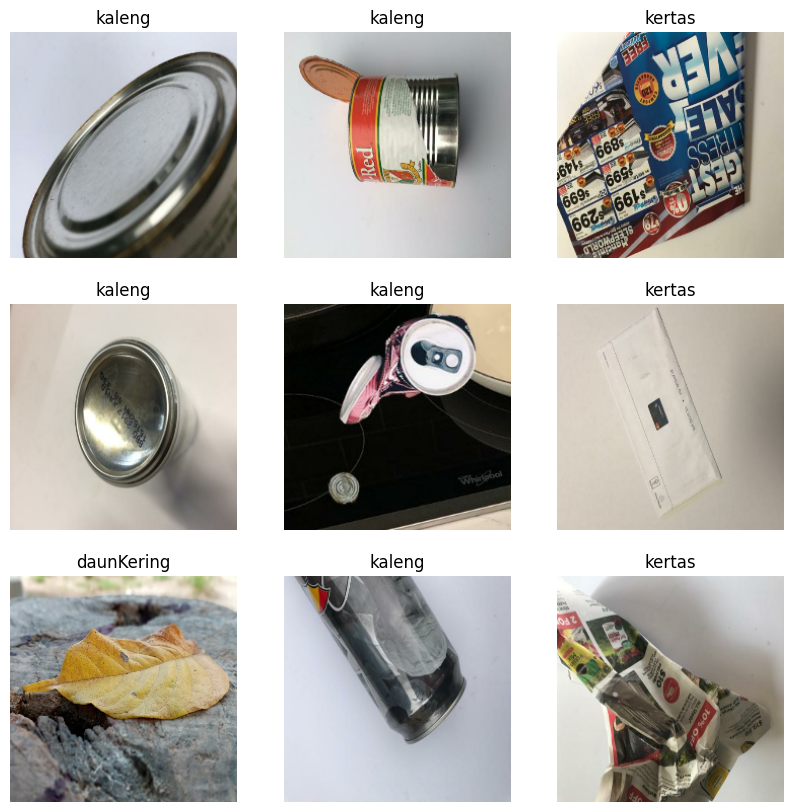

In [100]:
class_names = ['botol','daunKering','kaleng','kertas']
plt.figure(figsize=(10, 10))
for images, labels in train_da.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [101]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1.0 / 255),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names))
    ]
)

In [103]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# callback, jika akurasi sudah 85% maka training akan berhenti
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.85):
            print("\nAkurasi telah mencapai >85%!")
            self.model.stop_training = True

callbacks = myCallback()

In [104]:
model.fit(
    train_da,
    validation_data=val_da,
    epochs=150,
    callbacks=[callbacks]
)

Epoch 1/150
44/44 [==============================] - 105s 2s/step - loss: 1.1793 - accuracy: 0.4693 - val_loss: 0.9769 - val_accuracy: 0.6000
Epoch 2/150
44/44 [==============================] - 100s 2s/step - loss: 0.7740 - accuracy: 0.7064 - val_loss: 0.6762 - val_accuracy: 0.7400
Epoch 3/150
44/44 [==============================] - 133s 3s/step - loss: 0.5863 - accuracy: 0.7950 - val_loss: 0.6609 - val_accuracy: 0.7600
Epoch 4/150
44/44 [==============================] - ETA: 0s - loss: 0.3795 - accuracy: 0.8671
Akurasi telah mencapai >85%!
44/44 [==============================] - 152s 3s/step - loss: 0.3795 - accuracy: 0.8671 - val_loss: 0.5434 - val_accuracy: 0.7800


In [105]:
model.evaluate(test_da)

13/13 [==============================] - 9s 502ms/step - loss: 0.7150 - accuracy: 0.7425


[0.7150096893310547, 0.7425000071525574]

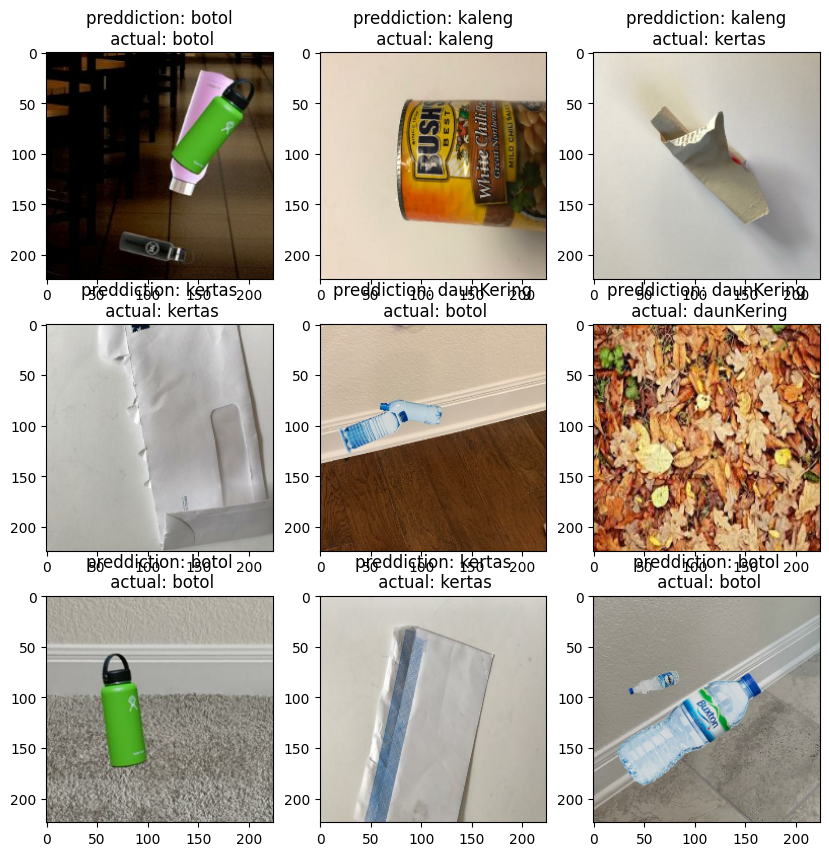

In [108]:
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in test_da.take(1):
    classifications = model(images)

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = np.argmax(classifications[i])
        plt.title('preddiction: ' + class_names[index] + '\n actual: ' + class_names[labels[i]])
